In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
import numpy as np

import tensorflow as tf

In [22]:
with open('./FastCharge_000009_CH7_structure.json') as f:
    file_content=f.read()
    
data = json.loads(file_content)

In [52]:
data.keys()

dict_keys(['@module', '@class', 'barcode', 'protocol', 'channel_id', 'summary', 'cycles_interpolated', 'diagnostic_summary', 'diagnostic_interpolated', '@version'])

In [35]:
len(data["cycles_interpolated"]['discharge_capacity'])

978000

In [54]:
big_df = pd.DataFrame(data["cycles_interpolated"])

In [60]:
big_df.keys()

Index(['voltage', 'internal_resistance', 'charge_capacity', 'current',
       'discharge_capacity', 'temperature', 'cycle_index', 'step_type'],
      dtype='object')

In [65]:
len(big_df.loc[big_df["cycle_index"] == 0])

2000

In [59]:
sns.lineplot(big_df.cycle_index, big_df.discharge_capacity)
plt.show()

/Users/anders/Library/Caches/pypoetry/virtualenvs/notebook-yHkKBcHi-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [34]:
big_df = big_df.T

In [37]:
big_df

0          1          2          3          4       \
voltage                    2.8   2.800701   2.801401   2.802102   2.802803   
internal_resistance   0.020987   0.020987   0.020987   0.020987   0.020987   
charge_capacity       1.075721   1.075721   1.075721   0.888178   0.614512   
current              -0.109994  -0.109993  -0.109992  -0.282445  -0.534092   
discharge_capacity    1.566264   1.566207    1.56615   1.375198   1.096584   
temperature          29.228088  29.228088  29.228088  29.332396   29.54071   
cycle_index                  0          0          0          0          0   
step_type            discharge  discharge  discharge  discharge  discharge   

                        5          6          7          8          9       \
voltage               2.803504   2.804204   2.804905   2.805606   2.806306   
internal_resistance   0.020987   0.020987   0.020987    0.02596    0.02846   
charge_capacity       0.340845   0.067179   0.751207   1.289787   1.397405   
current              -0.785739  -1.037387  -0.408382  -2.615445  -3.875022   
discharge_capacity    0.817969   0.539354   1.235537    1.76306   1.862178   
temperature          29.749025   29.95734  29.436659    30.7418  31.517103   
cycle_index                  0          0          0          0          0   
step_type            discharge  discharge  discharge  discharge  discharge   

                     ...  977990    977991    977992    977993    977994  \
voltage              ...     NaN       NaN       NaN       NaN       NaN   
internal_resistance  ...     NaN       NaN       NaN       NaN       NaN   
charge_capacity      ...  1.4293  1.430744  1.432188  1.433631  1.435075   
current              ...     NaN       NaN       NaN       NaN       NaN   
discharge_capacity   ...     NaN       NaN       NaN       NaN       NaN   
temperature          ...     NaN       NaN       NaN       NaN       NaN   
cycle_index          ...     488       488       488       488       488   
step_type            ...  charge    charge    charge    charge    charge   

                       977995    977996    977997   977998    977999  
voltage                   NaN       NaN       NaN      NaN       NaN  
internal_resistance       NaN       NaN       NaN      NaN       NaN  
charge_capacity      1.436519  1.437963  1.439406  1.44085  1.442294  
current                   NaN       NaN       NaN      NaN       NaN  
discharge_capacity        NaN       NaN       NaN      NaN       NaN  
temperature               NaN       NaN       NaN      NaN       NaN  
cycle_index               488       488       488      488       488  
step_type              charge    charge    charge   charge    charge  

[8 rows x 978000 columns]

AttributeError: 'DataFrame' object has no attribute 'energy_efficiency'

In [45]:

discharge_df = big_df.loc[:, (big_df == "discharge").any()]

In [46]:
discharge_df

0          1          2          3          4       \
voltage                    2.8   2.800701   2.801401   2.802102   2.802803   
internal_resistance   0.020987   0.020987   0.020987   0.020987   0.020987   
charge_capacity       1.075721   1.075721   1.075721   0.888178   0.614512   
current              -0.109994  -0.109993  -0.109992  -0.282445  -0.534092   
discharge_capacity    1.566264   1.566207    1.56615   1.375198   1.096584   
temperature          29.228088  29.228088  29.228088  29.332396   29.54071   
cycle_index                  0          0          0          0          0   
step_type            discharge  discharge  discharge  discharge  discharge   

                        5          6          7          8          9       \
voltage               2.803504   2.804204   2.804905   2.805606   2.806306   
internal_resistance   0.020987   0.020987   0.020987    0.02596    0.02846   
charge_capacity       0.340845   0.067179   0.751207   1.289787   1.397405   
current              -0.785739  -1.037387  -0.408382  -2.615445  -3.875022   
discharge_capacity    0.817969   0.539354   1.235537    1.76306   1.862178   
temperature          29.749025   29.95734  29.436659    30.7418  31.517103   
cycle_index                  0          0          0          0          0   
step_type            discharge  discharge  discharge  discharge  discharge   

                     ...     488990     488991     488992     488993  \
voltage              ...   3.493694   3.494394   3.495095   3.495796   
internal_resistance  ...   0.021601   0.021601   0.021601   0.021601   
charge_capacity      ...   0.826311   0.826311   0.826311   0.826311   
current              ...  -3.635706  -3.615113  -3.594521  -3.573928   
discharge_capacity   ...   0.000002   0.000002   0.000002   0.000002   
temperature          ...  29.116201  29.116201  29.116201  29.116201   
cycle_index          ...        488        488        488        488   
step_type            ...  discharge  discharge  discharge  discharge   

                        488994     488995     488996     488997     488998  \
voltage               3.496496   3.497197   3.497898   3.498599   3.499299   
internal_resistance   0.021601   0.021601   0.021601   0.021601   0.021601   
charge_capacity       0.826311   0.826311   0.826311   0.826311   0.826311   
current              -3.553335  -3.532743   -3.51215  -3.491557  -3.470964   
discharge_capacity    0.000002   0.000002   0.000002   0.000002   0.000002   
temperature          29.116201  29.116201  29.116201  29.116201  29.116201   
cycle_index                488        488        488        488        488   
step_type            discharge  discharge  discharge  discharge  discharge   

                        488999  
voltage                    3.5  
internal_resistance   0.021601  
charge_capacity       0.826311  
current              -3.450372  
discharge_capacity    0.000002  
temperature          29.116201  
cycle_index                488  
step_type            discharge  

[8 rows x 489000 columns]

In [ ]:
######

In [3]:
df = pd.DataFrame(data["summary"])

In [4]:
df

cycle_index  discharge_capacity  charge_capacity  discharge_energy  \
0              0            1.952085         1.442294          6.172215   
1              1            1.064089         1.064247          3.230305   
2              2            1.067267         1.067108          3.236908   
3              3            1.068833         1.068538          3.245779   
4              4            1.069751         1.069548          3.250275   
..           ...                 ...              ...               ...   
484          484            0.832141         0.834566          2.333637   
485          485            0.829895         0.832046          2.322409   
486          486            0.828143         0.830505          2.319833   
487          487            0.826006         0.828447          2.313366   
488          488            0.823912         0.826311          2.305246   

     charge_energy  dc_internal_resistance  temperature_maximum  \
0         4.756974                0.029503            32.472378   
1         3.710330                0.017750            34.012157   
2         3.713411                0.017678            33.475590   
3         3.718166                0.017639            33.775085   
4         3.719827                0.017572            33.972847   
..             ...                     ...                  ...   
484       2.968663                0.021445            30.559654   
485       2.959778                0.021383            30.666451   
486       2.955176                0.021383            30.180288   
487       2.947526                0.021468            30.179083   
488       2.939867                0.021601            29.916067   

     temperature_average  temperature_minimum              date_time_iso  \
0              29.325228            21.553053  2017-07-01T03:48:16+00:00   
1              31.061043            29.069750  2017-07-02T01:21:04+00:00   
2              30.641012            28.394760  2017-07-02T02:20:48+00:00   
3              30.922800            29.092196  2017-07-02T03:22:40+00:00   
4              31.024357            28.985891  2017-07-02T04:22:24+00:00   
..                   ...                  ...                        ...   
484            29.557486            28.687757  2017-07-22T09:27:28+00:00   
485            29.487234            28.328018  2017-07-22T10:25:04+00:00   
486            29.604254            29.103733  2017-07-22T11:22:40+00:00   
487            29.583853            28.901321  2017-07-22T12:20:16+00:00   
488            29.338520            28.300682  2017-07-22T13:15:44+00:00   

     energy_efficiency  charge_throughput  energy_throughput  charge_duration  \
0             1.297509           1.442294           4.756974          33152.0   
1             0.870625           2.506541           8.467304            640.0   
2             0.871681           3.573649          12.180716            640.0   
3             0.872952           4.642187          15.898882            512.0   
4             0.873771           5.711734          19.618708            512.0   
..                 ...                ...                ...              ...   
484           0.786090         495.928223        1737.558228              NaN   
485           0.784656         496.760284        1740.517944              NaN   
486           0.785007         497.590790        1743.473145              NaN   
487           0.784850         498.419220        1746.420654              NaN   
488           0.784133         499.245544        1749.360596              NaN   

     time_temperature_integrated  paused  
0                   37852.743677       0  
1                    1853.580343       0  
2                    1893.820312       0  
3                    1843.066048       0  
4                    1851.416532       0  
..                           ...     ...  
484                  1700.791394       0  
485                  1689.664412       0  
486                  1702.

In [5]:
pd.isnull(df).any()

cycle_index                    False
discharge_capacity             False
charge_capacity                False
discharge_energy               False
charge_energy                  False
dc_internal_resistance         False
temperature_maximum            False
temperature_average            False
temperature_minimum            False
date_time_iso                  False
energy_efficiency              False
charge_throughput              False
energy_throughput              False
charge_duration                 True
time_temperature_integrated    False
paused                         False
dtype: bool

In [6]:
sns.displot(df["paused"], bins = 2)
plt.show()

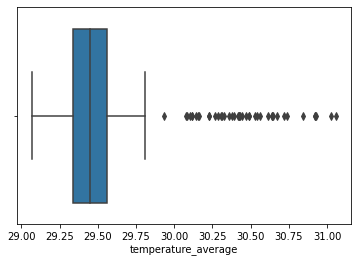

In [7]:
sns.boxplot(x = df["temperature_average"])
plt.show()

In [8]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(data=df)

<AxesSubplot:>

In [9]:
df.describe()

cycle_index  discharge_capacity  charge_capacity  discharge_energy  \
count   489.000000          489.000000       489.000000        489.000000   
mean    244.000000            1.021562         1.020952          3.005625   
std     141.306405            0.074353         0.063383          0.277310   
min       0.000000            0.823912         0.826311          2.305246   
25%     122.000000            0.999487         1.000199          2.895915   
50%     244.000000            1.042823         1.042864          3.067267   
75%     366.000000            1.064959         1.064807          3.185787   
max     488.000000            1.952085         1.442294          6.172215   

       charge_energy  dc_internal_resistance  temperature_maximum  \
count     489.000000              489.000000           489.000000   
mean        3.577424                0.017918            30.532043   
std         0.198286                0.001241             0.763418   
min         2.939867                0.016928            29.611187   
25%         3.521805                0.017158            30.089558   
50%         3.650638                0.017350            30.339581   
75%         3.712273                0.018224            30.639782   
max         4.756974                0.029503            34.012157   

       temperature_average  temperature_minimum  energy_efficiency  \
count           489.000000           489.000000         489.000000   
mean             29.517644            28.580231           0.838665   
std               0.335717             0.455652           0.031891   
min              29.068529            21.553053           0.784133   
25%              29.336143            28.364573           0.822168   
50%              29.447075            28.620363           0.840221   
75%              29.559708            28.836496           0.858305   
max              31.061043            29.300552           1.297509   

       charge_throughput  energy_throughput  charge_duration  \
count         489.000000         489.000000       462.000000   
mean          257.766089         899.992935       714.251082   
std           145.834112         510.814703      1516.844100   
min             1.442294           4.756974       512.000000   
25%           131.927231         458.941986       640.000000   
50%           260.609650         908.533386       640.000000   
75%           385.728882        1347.602783       640.000000   
max           499.245544        1749.360596     33152.000000   

       time_temperature_integrated  paused  
count                   489.000000   489.0  
mean                   1859.957951     0.0  
std                    1753.861863     0.0  
min                    1557.834090     0.0  
25%                    1746.404114     0.0  
50%                    1757.469979     0.0  
75%                    1768.891056     0.0  
max                   37852.743677     0.0

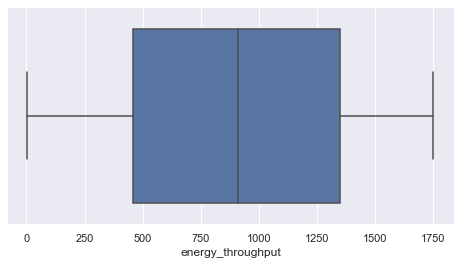

In [10]:
sns.boxplot(x = df["energy_throughput"])
plt.show()

In [11]:
sns.lineplot(data=df, x="cycle_index", y="charge_duration")

<AxesSubplot:xlabel='cycle_index', ylabel='charge_duration'>

In [12]:
sns.lineplot(data=df, x="cycle_index", y="time_temperature_integrated")

<AxesSubplot:xlabel='cycle_index', ylabel='time_temperature_integrated'>

<AxesSubplot:xlabel='cycle_index', ylabel='charge_throughput'>

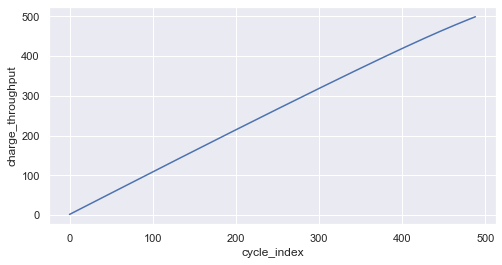

In [13]:
sns.lineplot(data=df, x="cycle_index", y="charge_throughput")

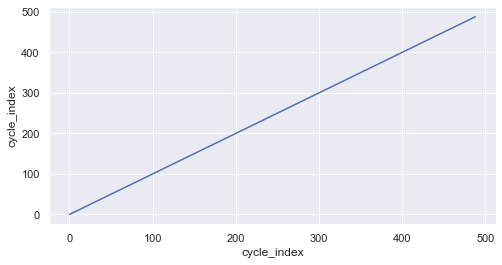

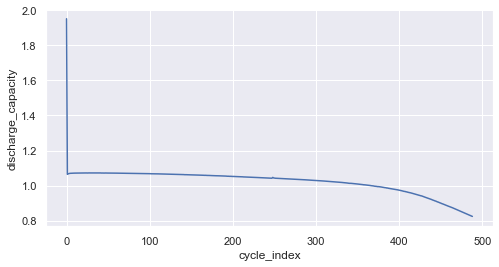

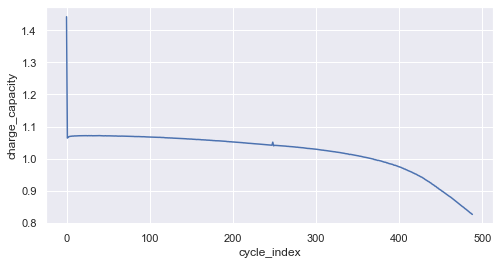

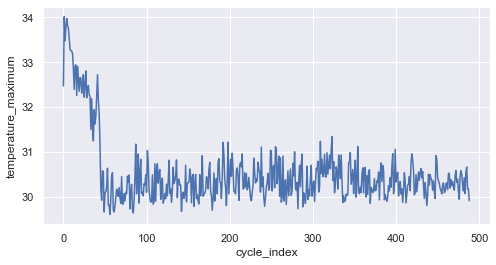

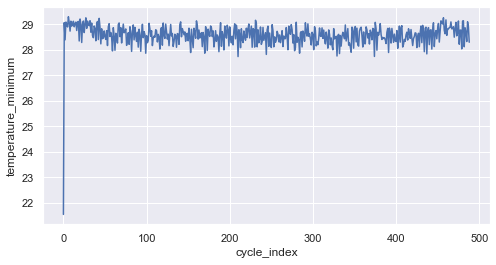

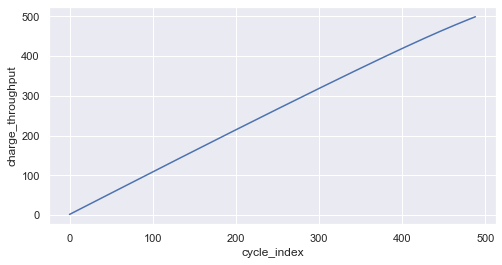

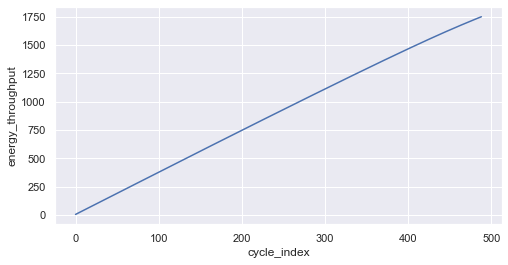

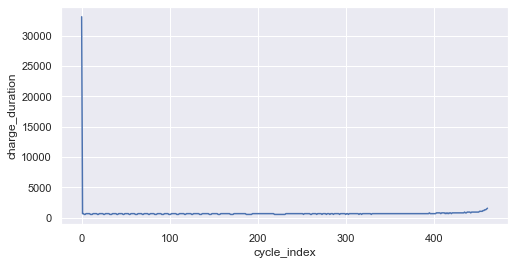

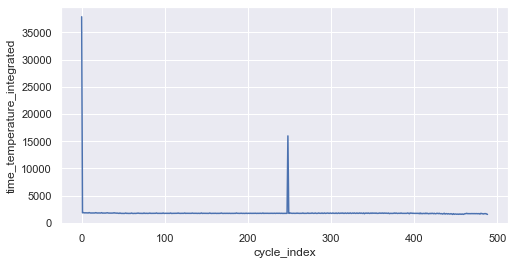

In [14]:
for col in df.columns:
    sns.lineplot(x=df["cycle_index"], y=df[col])
    plt.show()


In [15]:
clean_df = df.drop(
    [
        "cycle_index",
        "date_time_iso",
        "paused",
        "temperature_maximum",
        "temperature_minimum",
        "time_temperature_integrated",
        "charge_duration"
    ], 
    axis=1
)

In [16]:
clean_df.describe()

discharge_capacity  charge_capacity  discharge_energy  charge_energy  \
count          489.000000       489.000000        489.000000     489.000000   
mean             1.021562         1.020952          3.005625       3.577424   
std              0.074353         0.063383          0.277310       0.198286   
min              0.823912         0.826311          2.305246       2.939867   
25%              0.999487         1.000199          2.895915       3.521805   
50%              1.042823         1.042864          3.067267       3.650638   
75%              1.064959         1.064807          3.185787       3.712273   
max              1.952085         1.442294          6.172215       4.756974   

       dc_internal_resistance  temperature_average  energy_efficiency  \
count              489.000000           489.000000         489.000000   
mean                 0.017918            29.517644           0.838665   
std                  0.001241             0.335717           0.031891   
min                  0.016928            29.068529           0.784133   
25%                  0.017158            29.336143           0.822168   
50%                  0.017350            29.447075           0.840221   
75%                  0.018224            29.559708           0.858305   
max                  0.029503            31.061043           1.297509   

       charge_throughput  energy_throughput  
count         489.000000         489.000000  
mean          257.766089         899.992935  
std           145.834112         510.814703  
min             1.442294           4.756974  
25%           131.927231         458.941986  
50%           260.609650         908.533386  
75%           385.728882        1347.602783  
max           499.245544        1749.360596

In [17]:
# Normalize rows and Transpose

df = (clean_df.T / clean_df.T.sum()).T
df.T

0         1         2         3         4    \
discharge_capacity      0.038145  0.020466  0.018933  0.017392  0.016122   
charge_capacity         0.028184  0.020469  0.018931  0.017387  0.016118   
discharge_energy        0.120610  0.062131  0.057423  0.052815  0.048983   
charge_energy           0.092955  0.071363  0.065876  0.060501  0.056059   
dc_internal_resistance  0.000577  0.000341  0.000314  0.000287  0.000265   
temperature_average     0.573037  0.597417  0.543575  0.503172  0.467547   
energy_efficiency       0.025354  0.016745  0.015464  0.014205  0.013168   
charge_throughput       0.028184  0.048210  0.063397  0.075537  0.086078   
energy_throughput       0.092955  0.162857  0.216087  0.258704  0.295660   

                             5         6         7         8         9    ...  \
discharge_capacity      0.015078  0.014113  0.013278  0.012575  0.011895  ...   
charge_capacity         0.015075  0.014110  0.013276  0.012572  0.011892  ...   
discharge_energy        0.045760  0.042853  0.040330  0.038161  0.036118  ...   
charge_energy           0.052421  0.049079  0.046163  0.043710  0.041355  ...   
dc_internal_resistance  0.000247  0.000230  0.000216  0.000206  0.000193  ...   
temperature_average     0.434642  0.407795  0.383468  0.359864  0.341385  ...   
energy_efficiency       0.012302  0.011512  0.010835  0.010255  0.009700  ...   
charge_throughput       0.095570  0.103521  0.110654  0.117371  0.122875  ...   
energy_throughput       0.328906  0.356787  0.381780  0.405287  0.424586  ...   

                             479       480       481       482       483  \
discharge_capacity      0.000374  0.000373  0.000371  0.000370  0.000368   
charge_capacity         0.000375  0.000374  0.000372  0.000371  0.000369   
discharge_energy        0.001049  0.001046  0.001041  0.001035  0.001032   
charge_energy           0.001334  0.001329  0.001324  0.001318  0.001313   
dc_internal_resistance  0.000010  0.000009  0.000009  0.000010  0.000009   
temperature_average     0.013051  0.013056  0.013152  0.012978  0.013009   
energy_efficiency       0.000349  0.000349  0.000348  0.000347  0.000347   
charge_throughput       0.218391  0.218388  0.218365  0.218403  0.218395   
energy_throughput       0.765066  0.765076  0.765017  0.765169  0.765158   

                             484       485       486       487       488  
discharge_capacity      0.000366  0.000365  0.000363  0.000362  0.000360  
charge_capacity         0.000368  0.000366  0.000365  0.000363  0.000362  
discharge_energy        0.001028  0.001021  0.001018  0.001014  0.001009  
charge_energy           0.001307  0.001301  0.001297  0.001292  0.001286  
dc_internal_resistance  0.000009  0.000009  0.000009  0.000009  0.000009  
temperature_average     0.013016  0.012964  0.012993  0.012963  0.012836  
energy_efficiency       0.000346  0.000345  0.000345  0.000344  0.000343  
charge_throughput       0.218392  0.218403  0.218394  0.218399  0.218426  
energy_throughput       0.765168  0.765226  0.765215  0.765254  0.765368  

[9 rows x 489 columns]

In [18]:
Y = df["charge_capacity"]
X = df.drop(["charge_capacity"], axis=1)

In [19]:
Y

0      0.028184
1      0.020469
2      0.018931
3      0.017387
4      0.016118
         ...   
484    0.000368
485    0.000366
486    0.000365
487    0.000363
488    0.000362
Name: charge_capacity, Length: 489, dtype: float64

In [20]:
X

discharge_capacity  discharge_energy  charge_energy  \
0              0.038145          0.120610       0.092955   
1              0.020466          0.062131       0.071363   
2              0.018933          0.057423       0.065876   
3              0.017392          0.052815       0.060501   
4              0.016122          0.048983       0.056059   
..                  ...               ...            ...   
484            0.000366          0.001028       0.001307   
485            0.000365          0.001021       0.001301   
486            0.000363          0.001018       0.001297   
487            0.000362          0.001014       0.001292   
488            0.000360          0.001009       0.001286   

     dc_internal_resistance  temperature_average  energy_efficiency  \
0                  0.000577             0.573037           0.025354   
1                  0.000341             0.597417           0.016745   
2                  0.000314             0.543575           0.015464   
3                  0.000287             0.503172           0.014205   
4                  0.000265             0.467547           0.013168   
..                      ...                  ...                ...   
484                0.000009             0.013016           0.000346   
485                0.000009             0.012964           0.000345   
486                0.000009             0.012993           0.000345   
487                0.000009             0.012963           0.000344   
488                0.000009             0.012836           0.000343   

     charge_throughput  energy_throughput  
0             0.028184           0.092955  
1             0.048210           0.162857  
2             0.063397           0.216087  
3             0.075537           0.258704  
4             0.086078           0.295660  
..                 ...                ...  
484           0.218392           0.765168  
485           0.218403           0.765226  
486           0.218394           0.765215  
487           0.218399           0.765254  
488           0.218426           0.765368  

[489 rows x 8 columns]

In [ ]:
################

In [ ]:
# https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352

In [ ]:
'''
A UDF to convert input data into 3-D
array as required for LSTM network.
'''

def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X[[(i+j+1)], :])
        output_X.append(t)
        output_y.append(y[i+lookback+1])
    return output_X, output_y

In [ ]:
# As required for LSTM networks, 
# we require to reshape an input data into 
# n_samples x timesteps x n_features. 
# In this example, the n_features is 2.
# We will make timesteps = 3. With this, the resultant n_samples is 5 (as the input data has 9 rows).

timesteps = 3

X, y = temporalize(
    X.values,
    y = np.zeros(len(X)),
    lookback=timesteps
)

In [ ]:
X

In [ ]:
X.shape

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])
        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y) 

In [ ]:
hist_window = 10 # allow model to see 10 steps back
horizon = 5 # Forecast next 5 cycles
N_EXAMPLES = Y.count()-horizon

x_train, y_train = custom_ts_multi_data_prep(
    dataset=X.values,
    target=Y.values,
    start=0,
    end=N_EXAMPLES,
    window=hist_window, 
    horizon=horizon
)

x_vali, y_vali = custom_ts_multi_data_prep(
    X.values,
    Y.values,
    N_EXAMPLES,
    None,
    hist_window,
    horizon
)

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0]) 

In [ ]:
batch_size = 16
buffer_size = 8
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat() 

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model, Sequential

n_features = 8
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
regressor_mae.fit(
    x_train,
    epochs=2,
    steps_per_epoch=1,
    verbose=1
)

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint] 

In [ ]:
history = lstm_model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=2,
    validation_data=val_data,
    validation_steps=1,
    verbose=1,
    callbacks=callbacks
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.InputLayer(input_shape=(9,))
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()


In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    dadfta, labels, test_size=0., random_state=21
)


min_val = tf.reduce_min(df)
max_val = tf.reduce_max(df)

train_data = df
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)


In [ ]:
history = autoencoder.fit(
    df, 
    df, 
    epochs=20, 
    batch_size=1,
    shuffle=True
)